In [72]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
DATA_PATH = os.path.join(os.path.abspath('../../'), 'db', 'data')
# PRIMARY_PATH = os.path.join(DATA_PATH, 'primary')
# SECONDARY_PATH = os.path.join(DATA_PATH, 'secondary')
TERTIARY_PATH = os.path.join(DATA_PATH, 'tertiary')

wpath = os.path.join(DATA_PATH, 'merge')

'/Users/pawel/code/bogumilo/rex-ai/model/db/data'

# Garch only

In [ ]:
import arch

In [ ]:
# a standard GARCH(1,1) model
garch = arch_model(returns, vol='garch', p=1, o=0, q=1)
garch_fitted = garch.fit()

# one-step out-of sample forecast
garch_forecast = garch_fitted.forecast(horizon=1)
predicted_et = garch_forecast.mean['h.1'].iloc[-1]

# Garch + ARIMA combined (often best practice)
![Red: ARMA, Green: Garch](https://miro.medium.com/max/862/1*azEK9WckHXBx73L8bTPu6Q.png)

In [66]:
import pmdarima as pm
import arch

returns = pd.read_csv(os.path.join(wpath, os.path.basename(SECONDARY_PATH), 'rets_.csv'), parse_dates=['Unnamed: 0'], index_col='Unnamed: 0')
returns = returns[['EUR_USD']]
returns = returns.dropna()

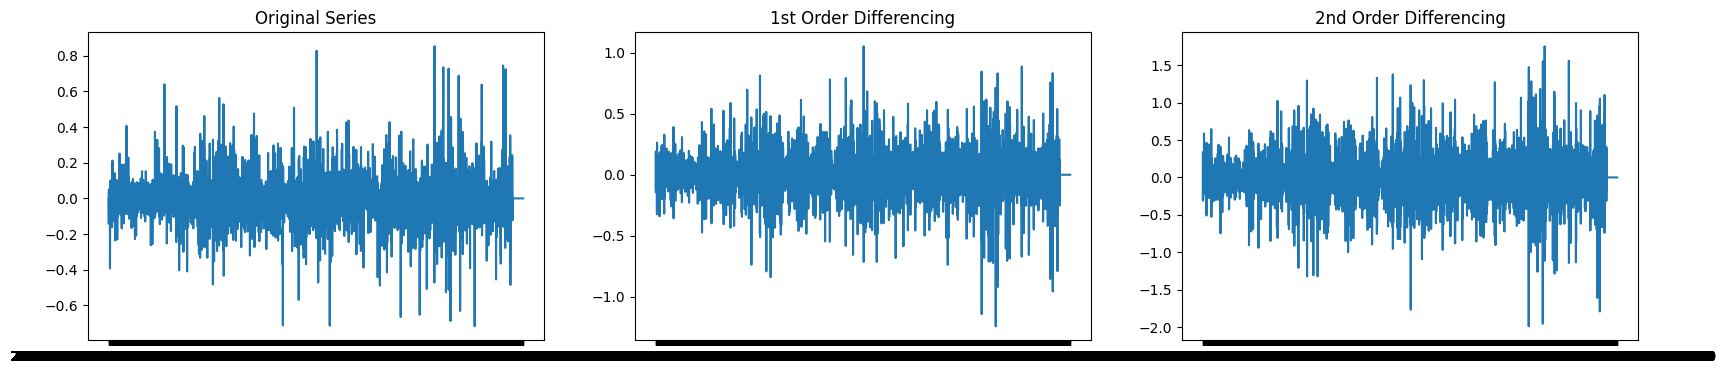

In [73]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,4))
ax1.plot(zero_diff); ax1.set_title('Original Series')
ax2.plot(first_order_diff); ax2.set_title('1st Order Differencing')
ax3.plot(second_order_diff); ax3.set_title('2nd Order Differencing');

In [65]:
# we fit an ARIMA(x,1,x) model in an attempt to account for as much auto-correlation in the mean of the data as possible
arima_model_fitted = pm.arima.auto_arima(returns)

In [74]:
arima_model_fitted

pmdarima.arima.arima.ARIMA

In [ ]:
#arima_model_fitted.predict(n_periods=5) dont work

# check correlation plots

In [75]:
from statsmodels.tsa.stattools import adfuller

adfuller(returns.EUR_USD)[1]  # p-value

0.0

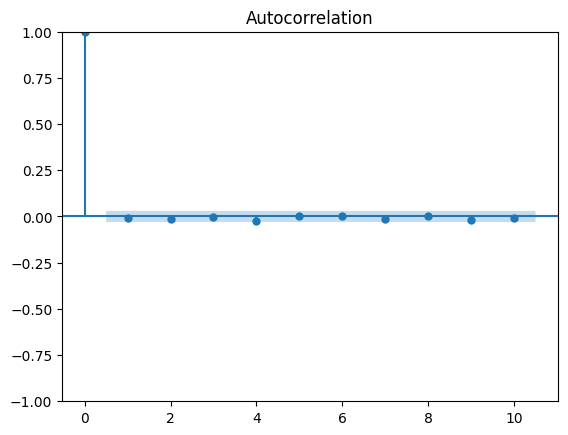

In [79]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(returns.EUR_USD, lags=10)
plt.show()

In [68]:
zero_diff = returns.EUR_USD
first_order_diff = returns.EUR_USD.diff(1)
second_order_diff = returns.EUR_USD.diff(1).diff(1)

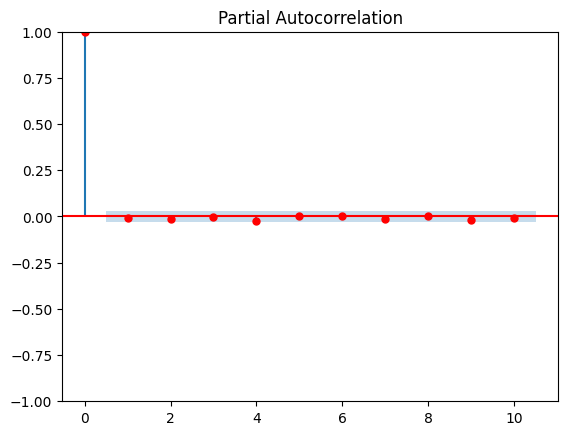

In [78]:
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(returns.EUR_USD, lags=10, c='r');

## with statsmodels

In [ ]:
import statsmodels.tsa.arima_model as stm
# fit ARIMA model
model = stm.ARIMA(returns, order=(1,1,1))
model_fit = model.fit()
# one-step out-of sample forecast
forecast = model_fit.forecast()[0]

AttributeError: 'function' object has no attribute 'arima_res_'

In [ ]:
import arch

In [ ]:
# fit a GARCH(1,1) model on the residuals of the ARIMA model
garch = arch.arch_model(arima_residuals, p=1, q=1)
garch_fitted = garch.fit()

# Use ARIMA to predict mu
predicted_mu = arima_model.predict(n_periods=1)[0]
# Use GARCH to predict the residual
garch_forecast = garch_model.forecast(horizon=1)
predicted_et = garch_forecast.mean['h.1'].iloc[-1]
# Combine both models' output: yt = mu + et
prediction = predicted_mu + predicted_et